In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1.8)

data = pd.read_csv("C:\\Users\\mihir\\Documents\\Play_Store_Project\\googleplaystore.csv")
reviews = pd.read_csv("C:\\Users\\mihir\\Documents\\Play_Store_Project\\googleplaystore_user_reviews.csv")

In [7]:
reviews.dropna(inplace=True)

In [8]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [9]:
# This app does not have a category mentioned, Hence, removing it.
data = data.drop([10472])

In [10]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [11]:
#reviews.isnull().sum()

In [12]:
# Remove duplicate rows

print ('length before removing duplicates', data.shape[0])
apps_data = data.drop_duplicates()   # Remove rows which are exactly similar.
print ('length after removing duplicates', apps_data.shape[0])

length before removing duplicates 10840
length after removing duplicates 10357


In [13]:
# Remove '+', ',' from installs and also convert to integer.
apps_data['Installs'] = apps_data.Installs.str.replace(',', '').str.replace('+', '').astype(int)
apps_data

C:\Users\mihir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [14]:
#Convert size of the app to integer.

def convert_size(s):
    # Replace 'varies with device' with np.nan
    # To later be replaced with mean size by SimpleImputer.
    if 'M' in s:
        return float(s.replace('M', ''))*(1e6)
    elif 'k' in s:
        return float(s.replace('k', ''))*(1024)
    else:
        return np.nan
    
apps_data.Size = apps_data.Size.apply(convert_size)


C:\Users\mihir\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
#Remove apps with same names. Only keep the ones with highest dwonloads.

apps_data = apps_data.groupby('App').apply(lambda df: df.loc[df.Installs.idxmax()])
apps_data.reset_index(drop=True, inplace=True)
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3600000.0,500,Free,0,Everyone,Sports,7-Oct-17,0.22,4.1 and up
1,#NAME?,COMICS,3.5,115,9100000.0,10000,Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
2,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000.0,1000000,Free,0,Everyone,Social,2-Aug-18,5.03,4.1 and up
3,.R,TOOLS,4.5,259,207872.0,10000,Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53000000.0,10000,Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up


In [16]:
# Find apps whose ratings are not given.

bool_series = pd.isnull(apps_data['Rating'])
null_rating_apps = apps_data[bool_series]

In [17]:
# Find reviews of apps that have null ratings, to get better idea about user experience.

# for index, rows in null_ratings.iterrows():
#     if not reviews[reviews['App'] == rows['App']].empty:
#         print ("here>>>>>>>>>>")
#         null_rating_app_reviews = reviews[reviews['App'] == rows['App']]
# #print (null_rating_app_reviews.head())

# # No such app could be found.

# Plot showing comparison between number of free and paid apps.

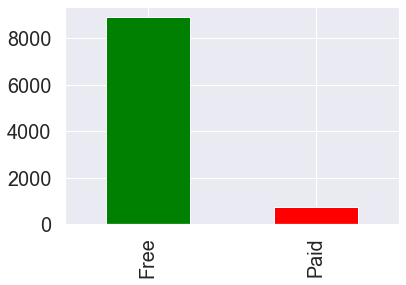

In [18]:
apps_data['Type'].value_counts().plot.bar(color=['green', 'red'])

# Number of apps in each category

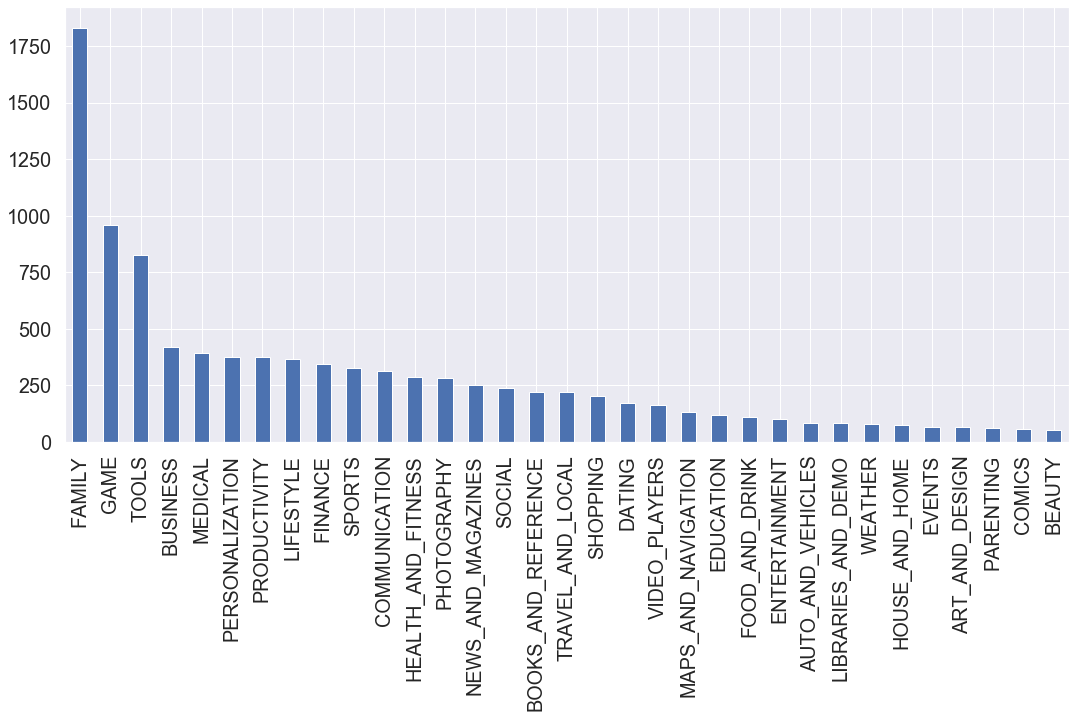

In [19]:
apps_data['Category'].value_counts().plot.bar(figsize=(18,8))
plt.show()

# Plot showing number of free and paid apps by category.

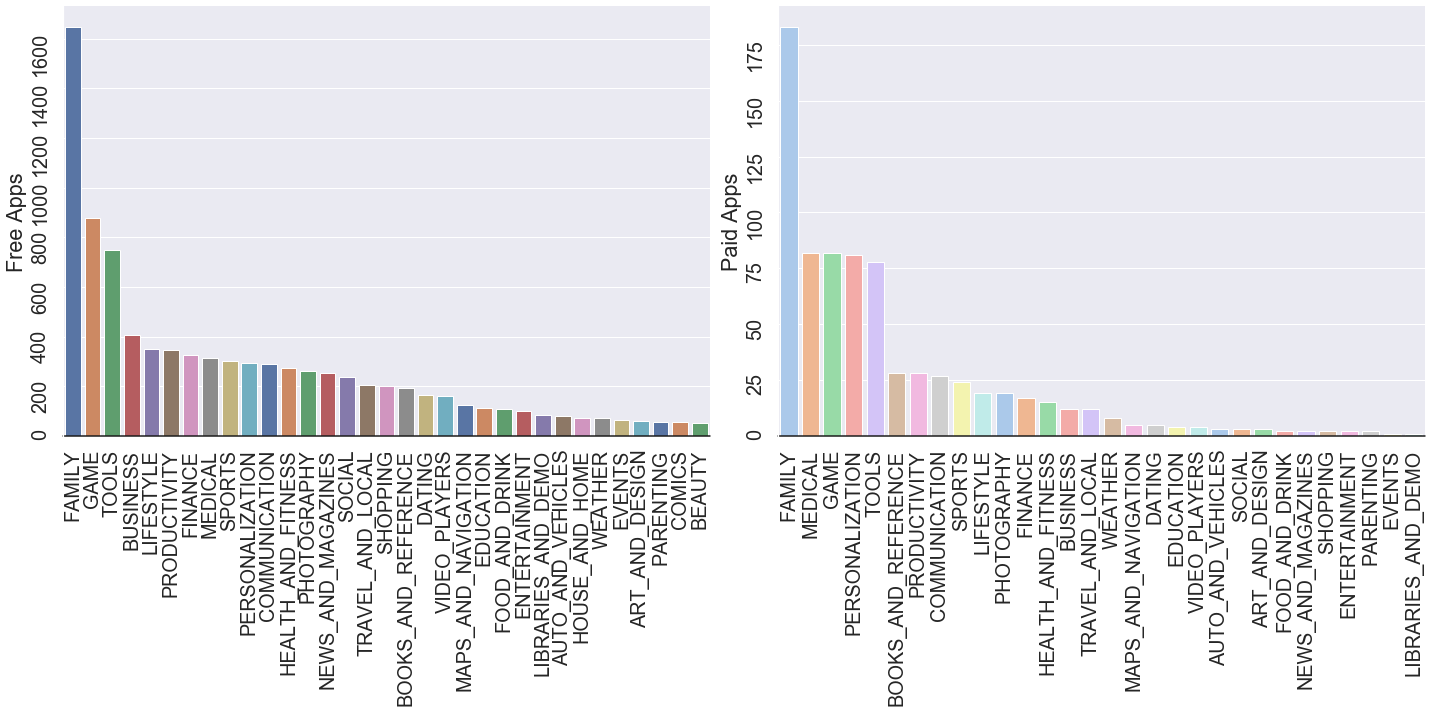

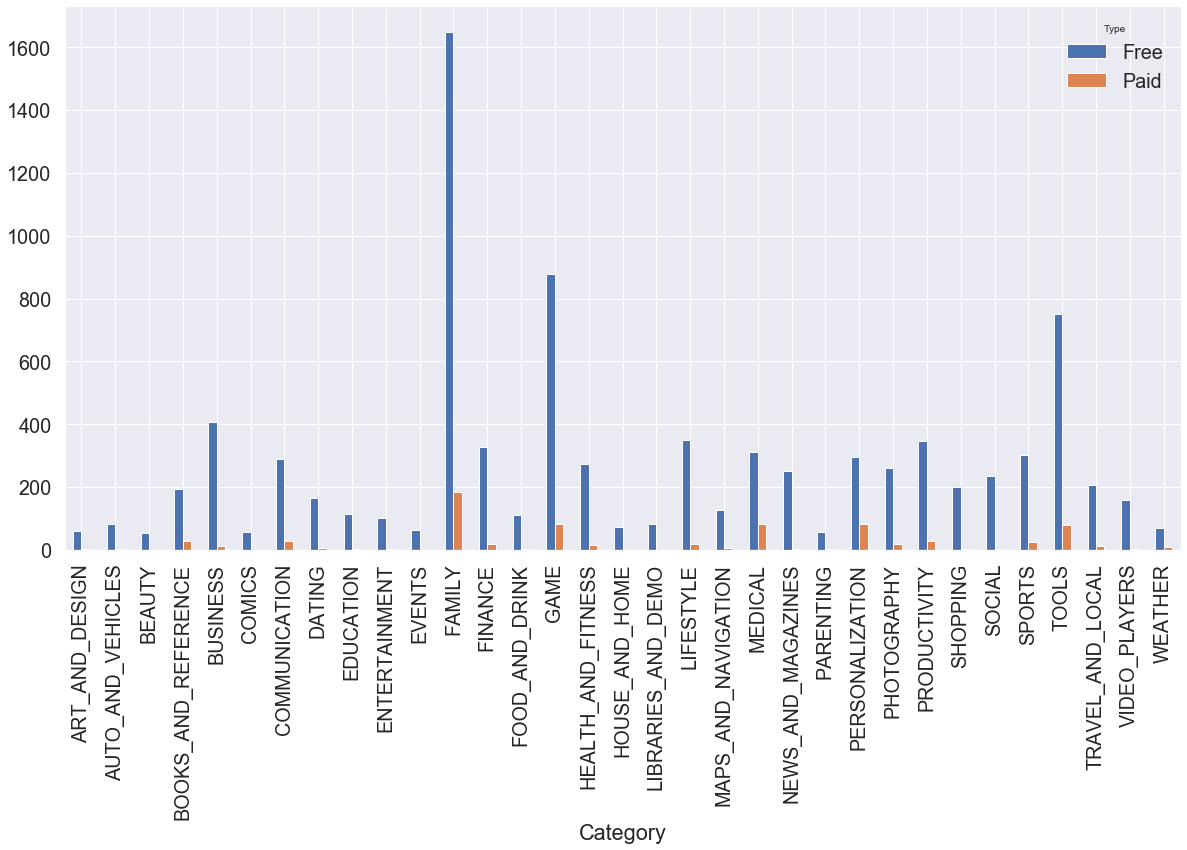

In [20]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
free_apps_per_cat = apps_data.loc[apps_data['Type']=='Free'].Category.value_counts()
paid_apps_per_cat = apps_data.loc[apps_data['Type']=='Paid'].Category.value_counts()

sns.barplot(x=np.array(list(free_apps_per_cat.index)), y=np.array(list(free_apps_per_cat)), palette="deep", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Free Apps")

sns.barplot(x=np.array(list(paid_apps_per_cat.index)), y=np.array(list(paid_apps_per_cat)), palette="pastel", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Paid Apps")

#Finalize the plot
sns.despine(bottom=True)

#Rotate labels of each plot.
for ax in f.axes:
    ax.tick_params(labelrotation=90)

plt.tight_layout(h_pad=2)

group_data = apps_data.groupby(['Category', 'Type']).apply(lambda df: df.Type.count())
group_data = group_data.to_frame()
group_data = group_data.rename(columns={0:'app_count'})
group_data = group_data.app_count
group_data.unstack().plot(kind='bar', figsize=(20,10))

## The top 3 categories for free apps are:-
1. Family
2. Game
3. Tools

## The top 3 categories for paid apps are:-
1. Family
2. Medical
3. Game

All categories have more free apps than paid apps.

C:\Users\mihir\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


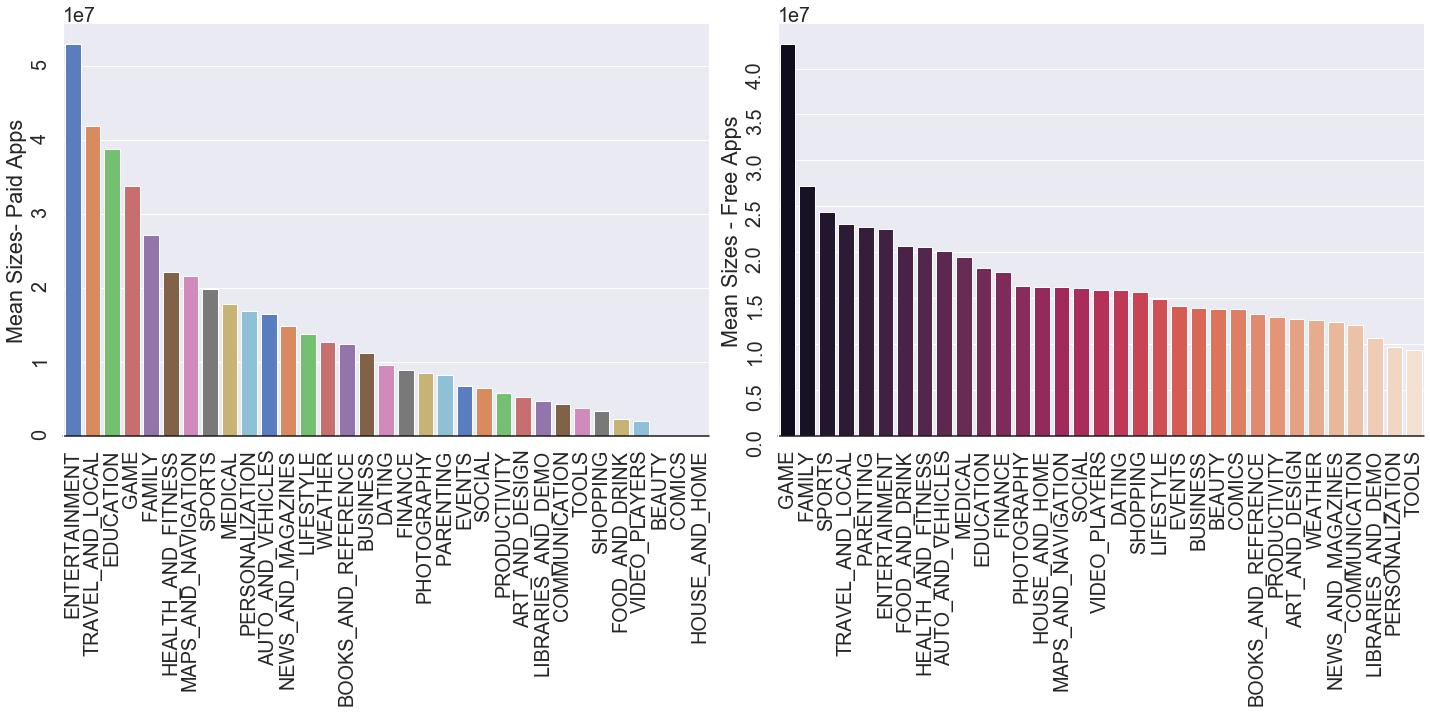

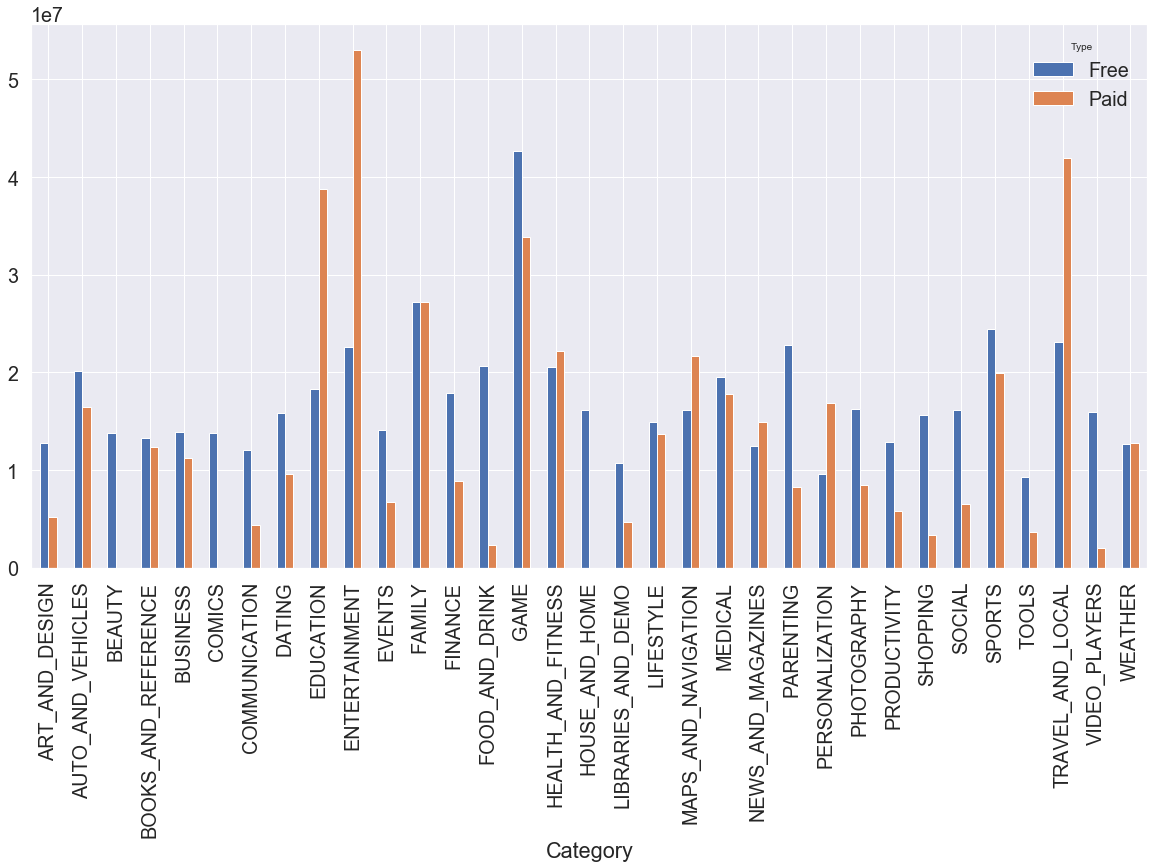

In [21]:
free_mean_sizes = apps_data.groupby(['Category']).apply(lambda df: df.loc[(df.Type == 'Free') & 
                  (df.Size != 'Varies with device')].Size.mean()).sort_values(ascending=False)
paid_mean_sizes = apps_data.groupby(['Category']).apply(lambda df: df.loc[(df.Type == 'Paid') & 
                  (df.Size != 'Varies with device')].Size.mean()).sort_values(ascending=False)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(x=np.array(list(paid_mean_sizes.index)), y=np.array(list(paid_mean_sizes)), palette="muted", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Mean Sizes- Paid Apps")

sns.barplot(x=np.array(list(free_mean_sizes.index)), y=np.array(list(free_mean_sizes)), palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Mean Sizes - Free Apps")

#Finalize the plot
sns.despine(bottom=True)

#Rotate labels of each plot.
for ax in f.axes:
    ax.tick_params(labelrotation=90)

#plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

##################
# Grouped barplot
##################
categ_mean_sizes_per_type = apps_data.groupby(['Category', 'Type']).apply(lambda df: df.loc[df.Size != 'Varies with device'].Size.mean())
categ_mean_sizes_per_type = categ_mean_sizes_per_type.to_frame()
categ_mean_sizes_per_type.rename(columns={0:'mean_sizes'}, inplace=True)
categ_mean_sizes_per_type.mean_sizes.unstack().plot(kind='bar', figsize=(20,10))

## The following categories have larger mean app sizes for paid apps:-
   1. Books and reference
   2. Education
   3. Entertainment
   4. Maps and navigation
   5. News and magazines
   6. Personalization
   7. Travel and local
   
#### Also note that Education and Entertainment have almost twice the mean size than their 'free' counterparts.
#### The Games category, surprisingly, has lower mean app size for the paid apps. Paid games usually come with better graphics and more features, hence the app sizes should have been greater.

## Analysis of Downloads

In [22]:
#!pip install squarify

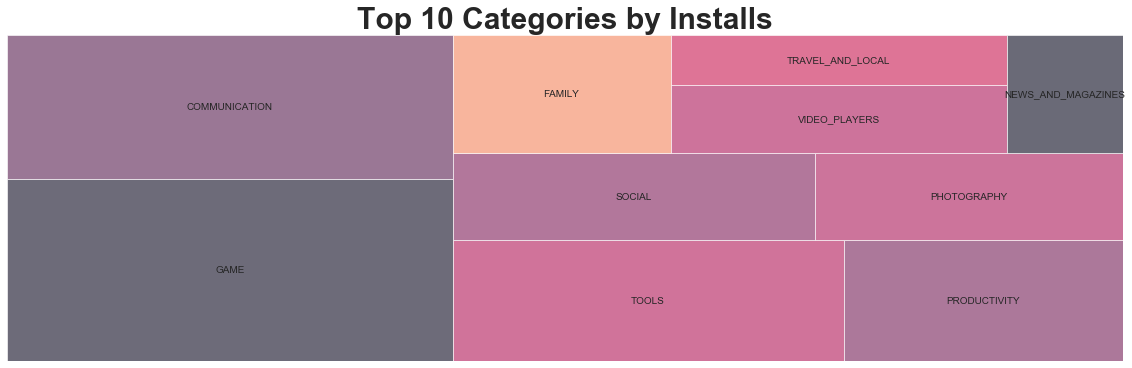

In [23]:
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 6)

x = apps_data.groupby(['Category']).Installs.sum().sort_values(ascending=False)
squarify.plot(sizes=x.tolist()[:10], label=x.index.tolist()[:10], alpha=0.6)
plt.title("Top 10 Categories by Installs",fontsize=30,fontweight="bold")
plt.axis('off')
plt.show()


#### We can see that Games and Communication categories have the highest number of installs.

In [24]:
unique_installs = sorted(apps_data.Installs.unique().tolist())

In [25]:
# This counts the total number of apps of each category in every install count.
# For eg., 'ART_AND_DESIGN' has total 3 apps that were installed 1000+ times.
#          'WEATHER' has 21 apps that were installed 1M+ times.

installs_count = apps_data.groupby(['Category', 'Installs']).apply(lambda df: df.Installs.count())
installs_count

Category        Installs
ART_AND_DESIGN  0            1
                100          1
                1000         3
                5000         5
                10000       11
                            ..
WEATHER         500000       7
                1000000     21
                5000000      7
                10000000    10
                50000000     4
Length: 512, dtype: int64

In [26]:
def plot_installs(install_range, lowest_range, highest_range):
    """
        This method plots the total number of apps that were downloaded for the given range of installation
        numbers for each category.
        For eg., 
        EDUCATION                 1
        HEALTH_AND_FITNESS        2
        SHOPPING                  5
        
    Arguments:
        install_range {list} : A List containing the installs range([100, 1000, 5000])
        lowest_range {string} : lowest number of installs in the given range, with k, M, B if applicable(for eg., 50M+).
        highest_range {string} : highest number of installs in the given range, with k, M, B if applicable(for eg., 50M+).
    
    Returns:
        None: Plots the generated lollipop graph.
    """

    totals = pd.Series([])
    for x in install_range:
        totals = totals.add(installs_count.loc[:, x], fill_value=0)
    totals = totals.to_frame().reset_index()
    totals = totals.rename(columns={0:'app_count'})

    ordered_totals = totals.sort_values(by='app_count')
    my_range=range(1,len(ordered_totals.index)+1)

    plt.figure(figsize=(20,15))
    plt.hlines(y=my_range, xmin=0, xmax=ordered_totals['app_count'], color='skyblue')
    plt.plot(ordered_totals['app_count'], my_range, "o", markersize=11)

    plt.yticks(my_range, ordered_totals['Category'])
    plt.xlabel("Apps")
    plt.title("No. of apps having installs between ranges {} and {}".format(lowest_range, highest_range))
    plt.ylabel('Category')


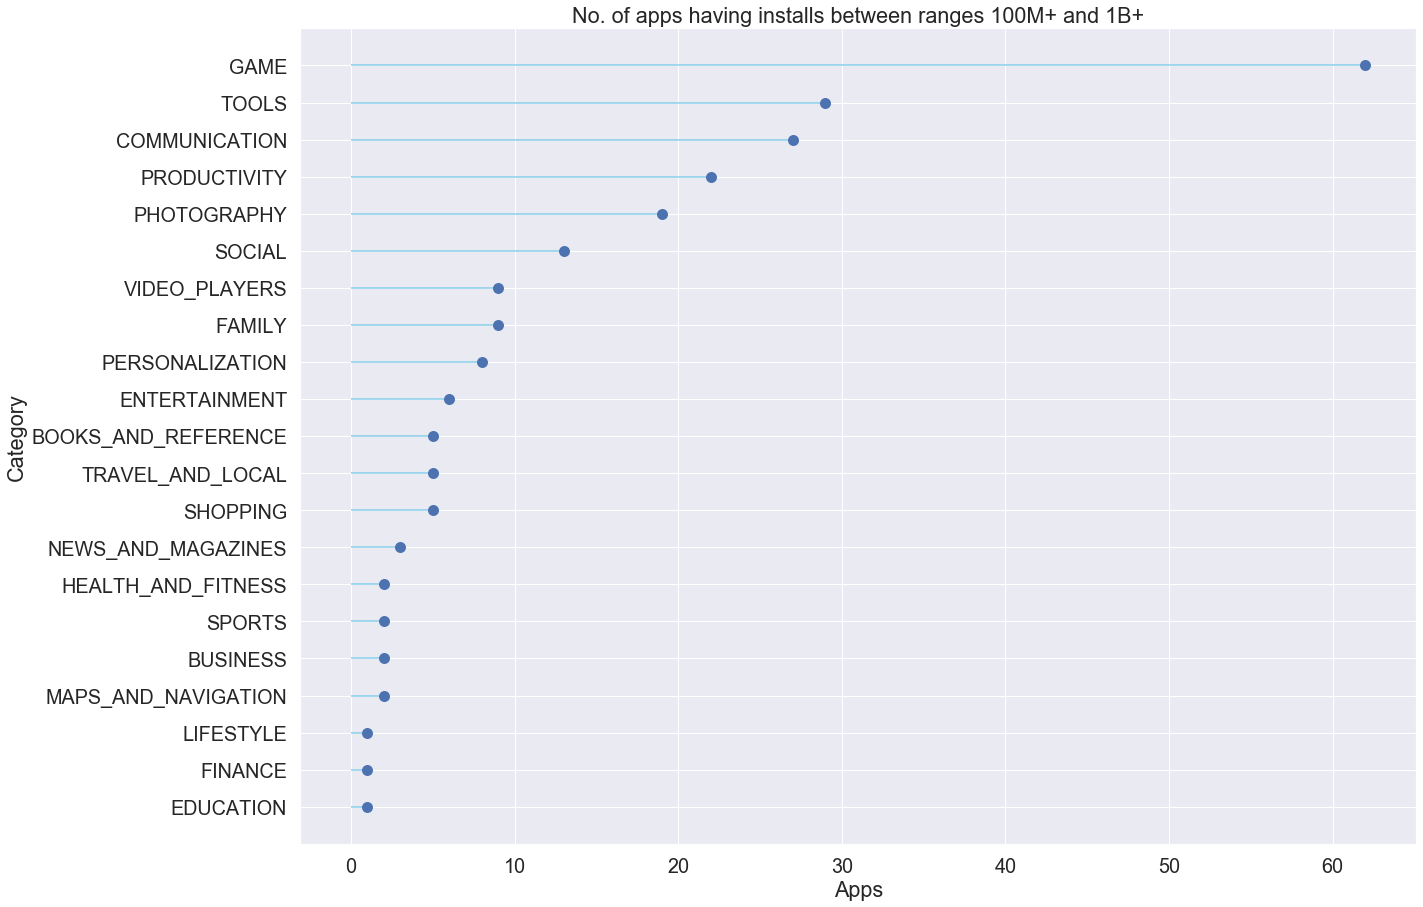

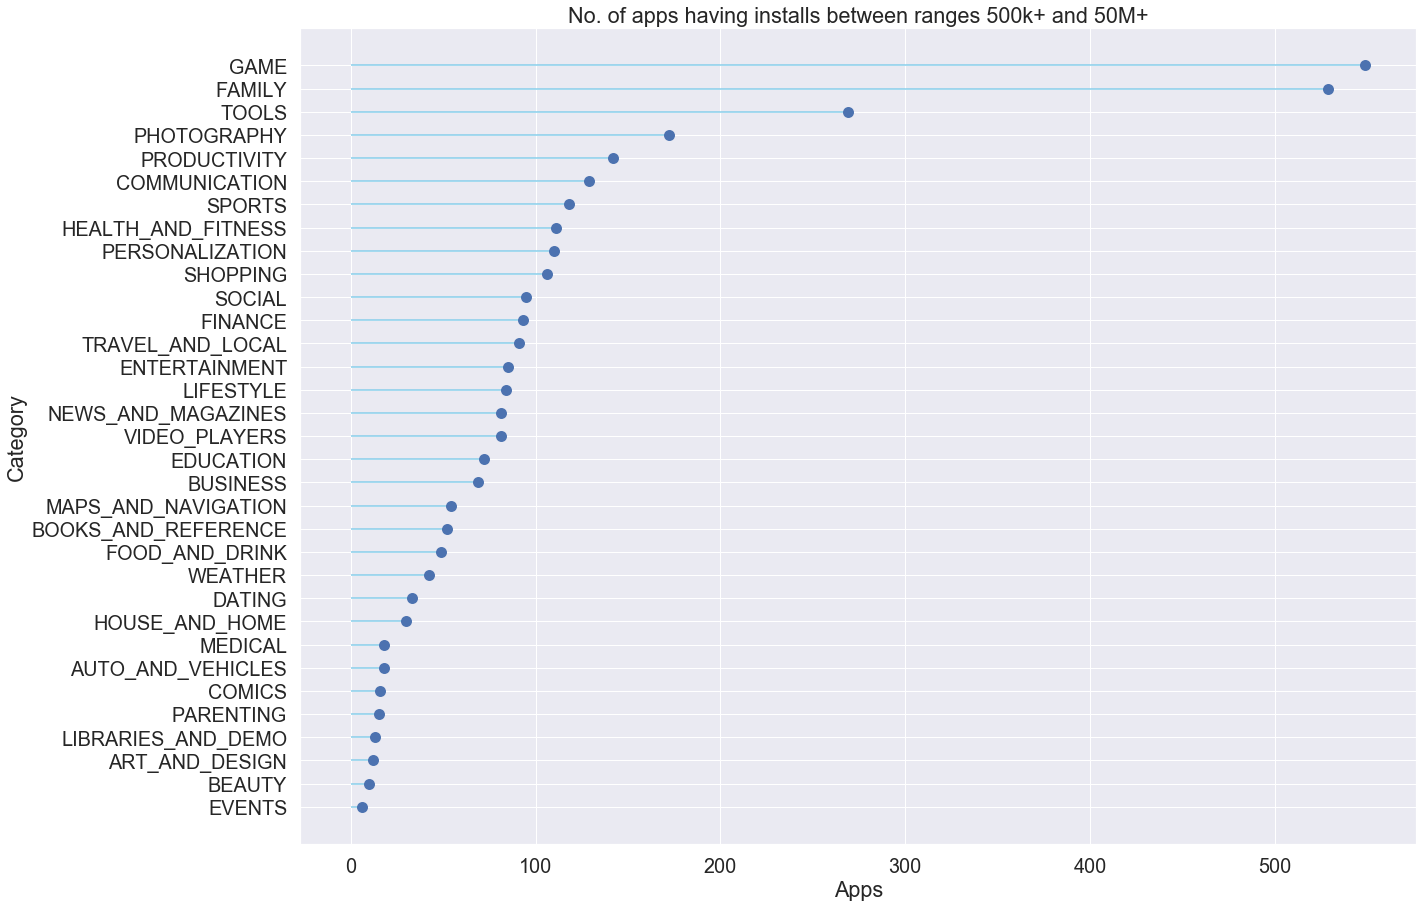

In [27]:
# 100 million+ to 1 billion+ downloads
top_3_install_counts = unique_installs[-3:]

# 500k+ to 50 million+ downloads
mid_range_install_counts = unique_installs[13:18]

plot_installs(top_3_install_counts, '100M+', '1B+')
plot_installs(mid_range_install_counts, '500k+', '50M+')

#### GAME category has 60+ apps that have between 100million, to more than a billion downloads.
#### Also, FAMILY and GAME category lead in the 500k to 50 million downloads bracket.
#### Hence, there are better chances to be profitable by creating an app in these categories.

### Comparison with social media apps:-
#### SOCIAL category has only about 12 apps having 100M+ downloads, out of a total of 239 apps. However, GAME category has about 63 apps having 100M+ downloads out of a total of 960 apps in the data set. There is a better chance to make a successful app in GAME category, than in the social media. Reason could be that social media apps are continuously providing new content, and hence after downloading, same users can keep using the application, without moving over to a newer app because interest is maintained with new content. With games though, once it is completed, there is no use for it, and is uninstalled most of the times. Many users dont even complete the game and switch to another game. 
#### Further analysis can be done about which genre of games are downladed most often.

In [28]:
game_apps = apps_data.loc[(apps_data.Category == 'GAME') & (apps_data.Installs.isin(top_3_install_counts))]
game_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
101,8 Ball Pool,GAME,4.5,14198297,52000000.0,100000000,Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
561,Agar.io,GAME,4.2,3816799,32000000.0,100000000,Free,0,Everyone,Action,23-Jul-18,2.2.8,4.0.3 and up
729,Angry Birds 2,GAME,4.6,3883589,57000000.0,100000000,Free,0,Everyone,Casual,26-Jul-18,2.21.1,4.1 and up
731,Angry Birds Classic,GAME,4.4,5566669,97000000.0,100000000,Free,0,Everyone,Arcade,24-May-18,7.9.3,4.1 and up
738,Angry Birds Rio,GAME,4.4,2610526,46000000.0,100000000,Free,0,Everyone,Arcade,3-Jul-18,2.6.9,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8599,Trivia Crack,GAME,4.5,6427773,95000000.0,100000000,Free,0,Everyone,Trivia,3-Aug-18,2.79.0,4.1 and up
8804,Vector,GAME,4.4,3058687,89000000.0,100000000,Free,0,Everyone 10+,Arcade,18-Jul-16,1.2.0,4.0 and up
9211,Yes day,GAME,4.5,10055521,94000000.0,100000000,Free,0,Everyone,Casual,28-Jun-18,1_39_93,4.0.3 and up
9296,Zombie Tsunami,GAME,4.4,4920817,NaN,100000000,Free,0,Everyone 10+,Arcade,15-Jun-18,Varies with device,Varies with device


In [29]:
game_apps.groupby(['Genres', 'Installs']).apply(lambda df: df.Installs.count())

Genres                        Installs  
Action                        100000000     13
                              500000000      1
Adventure                     100000000      1
Adventure;Action & Adventure  100000000      1
Arcade                        100000000     19
                              1000000000     1
Casual                        100000000      5
                              500000000      3
Casual;Action & Adventure     100000000      1
Puzzle                        100000000      3
Racing                        100000000      7
Sports                        100000000      3
Strategy                      100000000      3
Trivia                        100000000      1
dtype: int64

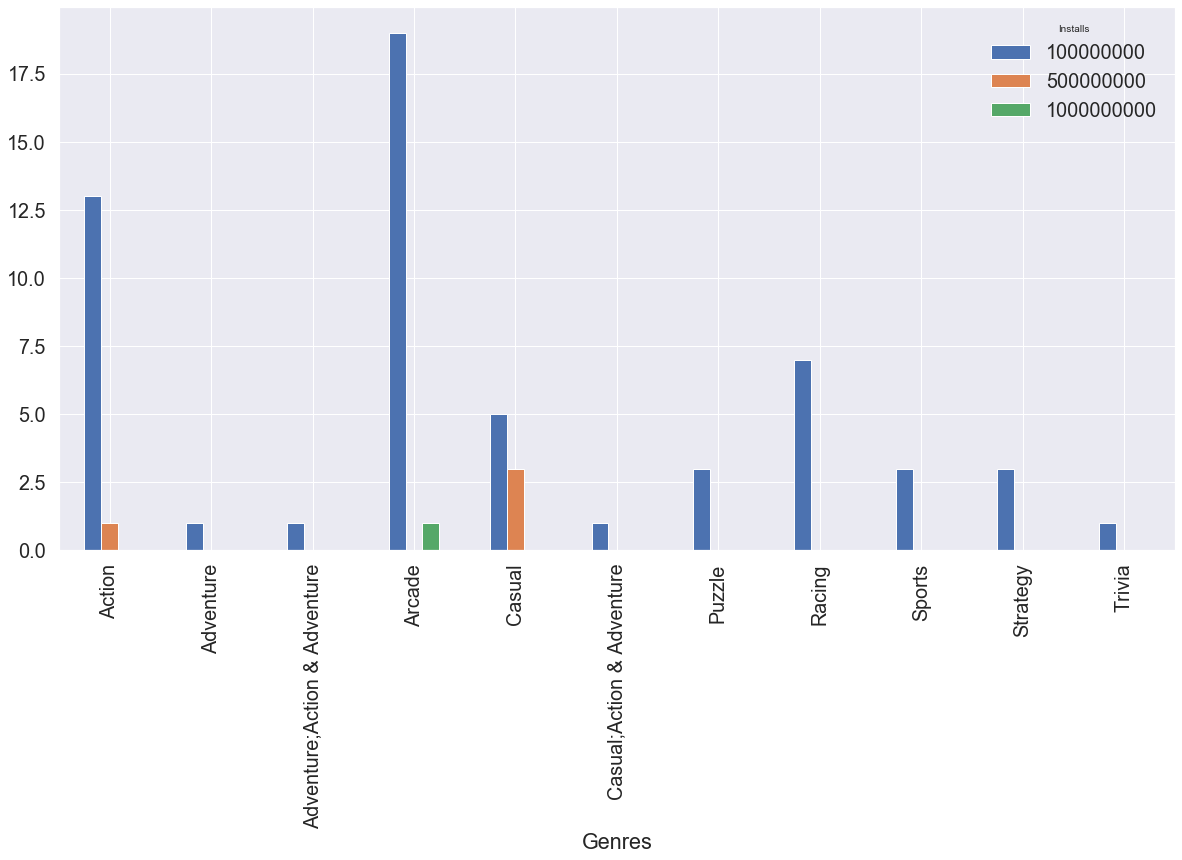

In [30]:
installs_total_category = game_apps.groupby(['Genres', 'Installs']).apply(lambda df: df.Installs.count())
installs_total_category = installs_total_category.to_frame()
installs_total_category.rename(columns={0:'mean_sizes'}, inplace=True)
installs_total_category.mean_sizes.unstack().plot(kind='bar', figsize=(20,10))

In [31]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [32]:
sentiment_pol_avg = reviews.groupby('App').apply(lambda df: df.Sentiment_Polarity.sum()/len(df.Sentiment_Polarity))
sentiment_pol_avg

App
10 Best Foods for You                                 0.470733
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                      0.392405
11st                                                  0.185943
1800 Contacts - Lens Store                            0.318145
1LINE – One Line with One Touch                       0.196290
                                                        ...   
Hotels.com: Book Hotel Rooms & Find Vacation Deals    0.101622
Hotspot Shield Free VPN Proxy & Wi-Fi Security        0.251765
Hotstar                                               0.038178
Hotwire Hotel & Car Rental App                        0.187029
Housing-Real Estate & Property                       -0.021427
Length: 865, dtype: float64

In [33]:
sentiment_sub_avg = reviews.groupby('App').apply(lambda df: df.Sentiment_Subjectivity.sum()/len(df.Sentiment_Subjectivity))
sentiment_sub_avg

App
10 Best Foods for You                                 0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                      0.545516
11st                                                  0.455340
1800 Contacts - Lens Store                            0.591098
1LINE – One Line with One Touch                       0.557315
                                                        ...   
Hotels.com: Book Hotel Rooms & Find Vacation Deals    0.545444
Hotspot Shield Free VPN Proxy & Wi-Fi Security        0.393284
Hotstar                                               0.493964
Hotwire Hotel & Car Rental App                        0.459717
Housing-Real Estate & Property                        0.378532
Length: 865, dtype: float64

# Machine Learning 

In [34]:
apps_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3600000.0,500,Free,0,Everyone,Sports,7-Oct-17,0.22,4.1 and up
1,#NAME?,COMICS,3.5,115,9100000.0,10000,Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
2,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000.0,1000000,Free,0,Everyone,Social,2-Aug-18,5.03,4.1 and up
3,.R,TOOLS,4.5,259,207872.0,10000,Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53000000.0,10000,Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up


In [35]:
# Remove apps with null ratings.

apps_data.dropna(subset=['Rating'], inplace=True)

In [36]:
apps_data.Category.value_counts()

FAMILY                 1608
GAME                    913
TOOLS                   720
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  133
MAPS_AND_NAVIGATION     118
EDUCATION               117
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           61
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [37]:
# apps_per_category = apps_data.Category.value_counts()
# category_list = apps_per_category.index.tolist()

# apps_data_copy = apps_data.copy()
# median_no_of_apps = apps_per_category.median()

# category_3 = apps_per_category.iloc[3:].loc[apps_per_category < median_no_of_apps].index.tolist()
# category_4 = apps_per_category.iloc[3:].loc[apps_per_category >= median_no_of_apps].index.tolist()

# for category in category_3:
#     apps_data_copy.loc[apps_data_copy['Category'] == category, 'Category_num'] = 4
# for category in category_4:
#     apps_data_copy.loc[apps_data_copy['Category'] == category, 'Category_num'] = 5
    
    
# # The top 3 categories with highest number of apps get their own category number.
# apps_data_copy.loc[apps_data_copy['Category'] == category_list[0], 'Category_num'] = 1
# apps_data_copy.loc[apps_data['Category'] == category_list[1], 'Category_num'] = 2
# apps_data_copy.loc[apps_data['Category'] == category_list[2], 'Category_num'] = 3

# # new_list = category_list[3:]
# # for category in new_list:
# #     apps_data_copy.loc[apps_data_copy['Category'] == category, 'Category_num'] = 4

# apps_data_copy = apps_data_copy.astype({'Category_num':int})

In [38]:
#apps_data_copy.Category_num.unique()

In [39]:
# from sklearn.model_selection import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in sss.split(apps_data_copy, apps_data_copy["Category_num"]):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     print ("Length TRAIN:", len(train_index), "Length TEST:", len(test_index))
#     strat_train_set = apps_data_copy.loc[train_index]
#     strat_test_set = apps_data_copy.loc[test_index]
    

In [40]:
#apps_data_copy
#np.where(pd.isnull(strat_test_set))
#strat_test_set[strat_test_set['Category'].isnull()].index


In [41]:
#strat_test_set['Category_num'].value_counts() / len(strat_test_set)

In [42]:
#apps_data_copy['Category_num'].value_counts() / len(apps_data_copy)

In [43]:
# from sklearn.model_selection import train_test_split

# def income_cat_proportions(data):
#     return data["Category_num"].value_counts() / len(data)

# train_set, test_set = train_test_split(apps_data_copy, test_size=0.2, random_state=42)

# compare_props = pd.DataFrame({
#     "Overall": income_cat_proportions(apps_data_copy),
#     "Stratified": income_cat_proportions(strat_test_set),
#     "Random": income_cat_proportions(test_set),
# }).sort_index()
# compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
# compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100

In [44]:
#compare_props

In [45]:
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,#NAME?,COMICS,3.5,115,9100000.0,10000,Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
2,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000.0,1000000,Free,0,Everyone,Social,2-Aug-18,5.03,4.1 and up
3,.R,TOOLS,4.5,259,207872.0,10000,Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53000000.0,10000,Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
5,058.ba,NEWS_AND_MAGAZINES,4.4,27,14000000.0,100,Free,0,Everyone,News & Magazines,6-Jul-18,1,4.2 and up


# Prepare the data

In [46]:
# Remove the dollar sign.

def convert_price(s):
    if '$' in str(s):
        return float(str(s).replace('$', ''))
    else:
        return float(str(s))
    
apps_data.Price = apps_data.Price.apply(convert_price)


In [47]:
apps_data.Size.describe()
#apps_data.loc[apps_data.App == "I'm Rich - Trump Edition"]
#apps_data

count    7.025000e+03
mean     2.176064e+07
std      2.272775e+07
min      8.704000e+03
25%      4.900000e+06
50%      1.300000e+07
75%      3.100000e+07
max      1.000000e+08
Name: Size, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(apps_data, test_size=0.2, random_state=42)

In [49]:
# Separate the 'Rating' label from the training data.
apps = train_set.drop("Rating", axis=1)
apps_ratings = train_set["Rating"].copy()

In [50]:
# Drop columns 'App', 'Last Updated', 'Current ver', 'Android ver'.

# Dropping 'Price' column too, because on applying standardization to it is not the same as the other columns.
# The free apps will also get a price associated to them, and that is not the right thing to do, as people normally download
# apps much more readily when those apps are free. Hence, attaching a standardized price to free apps for machine learning 
# analysis is debatable.

apps.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver', 'Price'], axis=1, inplace=True)

In [51]:
list(apps)

['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating', 'Genres']

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = ['Reviews', 'Size', 'Installs']
cat_attribs = ["Category", "Type", "Content Rating", "Genres"]

# handle_unknown = 'ignore' is needed to produce transformed test data with same dimensions as the transformed training data.
full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs),
    ])

apps_prepared = full_pipeline.fit_transform(apps)

In [104]:
apps_prepared

<6556x150 sparse matrix of type '<class 'numpy.float64'>'
	with 45892 stored elements in Compressed Sparse Row format>

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, apps_prepared, apps_ratings,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print ("mean score: ", lin_rmse_scores.mean())

mean score:  0.5248382704920744


In [57]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="sag")
ridge_scores = cross_val_score(ridge_reg, apps_prepared, apps_ratings,
                         scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
print ("mean score: ", ridge_rmse_scores.mean())

mean score:  0.5241863626778238


In [58]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg_scores = cross_val_score(lasso_reg, apps_prepared, apps_ratings,
                         scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_reg_scores)
print ("mean score: ", lasso_rmse_scores.mean())

mean score:  0.5314030640681716


In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_scores = cross_val_score(tree_reg, apps_prepared, apps_ratings,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print ("mean score: ", tree_rmse_scores.mean())

mean score:  0.6634506037395995


In [63]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_reg, apps_prepared, apps_ratings,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print ("mean score: ", forest_rmse_scores.mean())

mean score:  0.5094747160302149


In [64]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_scores = cross_val_score(svm_reg, apps_prepared, apps_ratings,
                         scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
print ("mean score: ", svm_rmse_scores.mean())

mean score:  0.5361999263312661


In [65]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_scores = cross_val_score(elastic_net, apps_prepared, apps_ratings,
                         scoring="neg_mean_squared_error", cv=10)
elastic_net_rmse_scores = np.sqrt(-elastic_net_scores)
print ("mean score: ", elastic_net_rmse_scores.mean())

mean score:  0.5314030640681716


In [118]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install xgboost

In [121]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_scores = cross_val_score(xgb_model, apps_prepared, apps_ratings,
                         scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)
print ("mean score: ", xgb_rmse_scores.mean())

mean score:  0.5113618523494393


# Hyper parameter tuning

## We will do hyperparameter tuning of the 3 best models found above:-
1. Random Forest
2. XGBoost
3. Ridge Regression

## 1) Random Forest

In [66]:
from sklearn.model_selection import GridSearchCV

max_depth_list = [int(x) for x in np.linspace(5, 30, num = 6)]
param_grid = [
    {'n_estimators': [100, 150, 200], 'max_features': [8, 10, 12, 14],
     'min_samples_split': [5, 10, 15, 100], 'min_samples_leaf': [2, 5, 10], 'max_depth': max_depth_list},
    # then try 6 (2×3) combinations with bootstrap set as False
    #{'bootstrap': [False], 'n_estimators': [150, 200], 'max_features': [10, 12, 14]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
forest_grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
forest_grid_search.fit(apps_prepared, apps_ratings)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [5, 10, 15, 20, 25

In [67]:
forest_grid_search.best_params_

{'max_depth': 30,
 'max_features': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 200}

In [73]:
forest_grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features=14, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [70]:
cvres = forest_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5201964050854925 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.5199065946547045 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
0.5199490121745307 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
0.5203375604611586 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
0.5199628911499946 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
0.5200639205744387 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
0.5203025295415429 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
0.5199676869416597 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}
0.520133757

In [74]:
np.sqrt(-forest_grid_search.best_score_)

0.4924727881419743

## The score obtained after hyperparameter tuning is 0.4924, which is slightly better than the score of 0.5094, which we got using default hyperparameter values. Hence this model can be used.

### Feature Importances

In [108]:
feature_importances = forest_grid_search.best_estimator_.feature_importances_
feature_importances

array([2.97532701e-01, 1.64155689e-01, 1.89506337e-01, 2.27931671e-03,
       2.11217367e-03, 1.45498975e-03, 3.96169234e-03, 3.87033565e-03,
       1.07902606e-03, 4.73429152e-03, 3.32622891e-03, 3.04156420e-03,
       1.28386509e-03, 3.86214781e-03, 7.59583089e-03, 5.43535303e-03,
       1.69534120e-03, 5.48815078e-03, 9.32582427e-03, 4.89782477e-04,
       1.57107634e-03, 5.24348136e-03, 3.46696614e-03, 4.35163651e-03,
       3.02115385e-03, 3.87436762e-03, 6.32131336e-03, 7.02287705e-03,
       4.36764751e-03, 1.78592261e-03, 2.72993664e-03, 3.77373867e-03,
       1.08264660e-02, 3.58049286e-03, 5.32815052e-03, 4.41149775e-04,
       1.22705580e-02, 1.27959963e-02, 1.41701259e-05, 9.21226779e-03,
       2.56824404e-03, 5.37026278e-03, 8.81820103e-03, 1.65301215e-03,
       4.72565310e-05, 6.87549793e-04, 1.72265744e-06, 0.00000000e+00,
       1.97578731e-03, 1.55440374e-04, 0.00000000e+00, 2.19246449e-03,
       4.50228855e-06, 0.00000000e+00, 2.41886369e-03, 1.48974742e-03,
      

In [123]:
list(cat_encoder.categories_)

[array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
        'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
        'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
        'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
        'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
        'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
        'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
        'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
        'VIDEO_PLAYERS', 'WEATHER'], dtype=object),
 array(['Free', 'Paid'], dtype=object),
 array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
        'Teen'], dtype=object),
 array(['Action', 'Action;Action & Adventure', 'Adventure',
        'Adventure;Action & Adventure', 'Adventure;Education', 'Arcade',
        'Arcade;Action & Adventure', 'Arcade;Pretend Play', 'Art & Design',
        'Art & Design;Creativity', 'Art & Design;Pretend Play',
       

In [124]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_)
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.29753270072270865, 'Reviews'),
 (0.18950633711978113, 'Installs'),
 (0.1641556888010319, 'Size'),
 (0.003961692344862779,
  array(['Action', 'Action;Action & Adventure', 'Adventure',
         'Adventure;Action & Adventure', 'Adventure;Education', 'Arcade',
         'Arcade;Action & Adventure', 'Arcade;Pretend Play', 'Art & Design',
         'Art & Design;Creativity', 'Art & Design;Pretend Play',
         'Auto & Vehicles', 'Beauty', 'Board', 'Board;Action & Adventure',
         'Board;Brain Games', 'Board;Pretend Play', 'Books & Reference',
         'Books & Reference;Education', 'Business', 'Card',
         'Card;Action & Adventure', 'Casino', 'Casual',
         'Casual;Action & Adventure', 'Casual;Brain Games',
         'Casual;Creativity', 'Casual;Education', 'Casual;Music & Video',
         'Casual;Pretend Play', 'Comics', 'Comics;Creativity',
         'Communication', 'Dating', 'Education',
         'Education;Action & Adventure', 'Education;Brain Games',
         'Education;C

### The most imporatant features in determining the rating of an app are the number of reviews, installs, and the app size.
### Surprisingly, the category and genre of the apps play a far smaller role in determining app rating. This suggests that its not true that users are more inclined to rate apps when they belong to certain genres.

In [106]:
from sklearn.metrics import mean_squared_error

final_tree_model = forest_grid_search.best_estimator_

# Separate the 'Rating' label from the training data.
test_apps = test_set.drop("Rating", axis=1)
test_apps_ratings = test_set["Rating"].copy()

test_apps.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver', 'Price'], axis=1, inplace=True)
test_apps_prepared = full_pipeline.transform(test_apps)
final_predictions = final_tree_model.predict(test_apps_prepared)

final_mse = mean_squared_error(test_apps_ratings, final_predictions)
final_rmse = np.sqrt(final_mse)

In [107]:
final_rmse

0.5177812844838301

## Save the model in current working directory

In [78]:
import joblib
joblib.dump(final_tree_model, "my_tree_model.pkl") # DIFF

['my_tree_model.pkl']

In [80]:
my_model_loaded = joblib.load("my_tree_model.pkl") # DIFF